# Iris Logistic Regression Implementation

The modified Iris flower data set consists of 50 samples from each of two species of Iris (Iris setosa and Iris versicolor) for binary classification. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. *In week 4 you will apply a Neural Network to the full Iris dataset for multiway classification*.

Your task is to design, fit and evaluate a Logistic Regression model to clasify the each species.

| Binary | Class |
| --- | --- |
| 0 | versicolor |
| 1 | setosa |

#### Step 1 - Import Dependencies

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error 

#### Step 2 - Import And Visualise The Data

In [9]:
# Import data as a Pandas DataFrame
iris = pd.read_csv('data/iris_modified.csv', sep='\t')
iris = pd.DataFrame(
    {
        "sepal_length": iris["sepal_length"],
        "sepal_width": iris["sepal_width"],
        "petal_length": iris["petal_length"],
        "petal_width": iris["petal_width"],
        "species": iris["species"]
    }
)

x_iris = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y_iris = iris["species"]

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


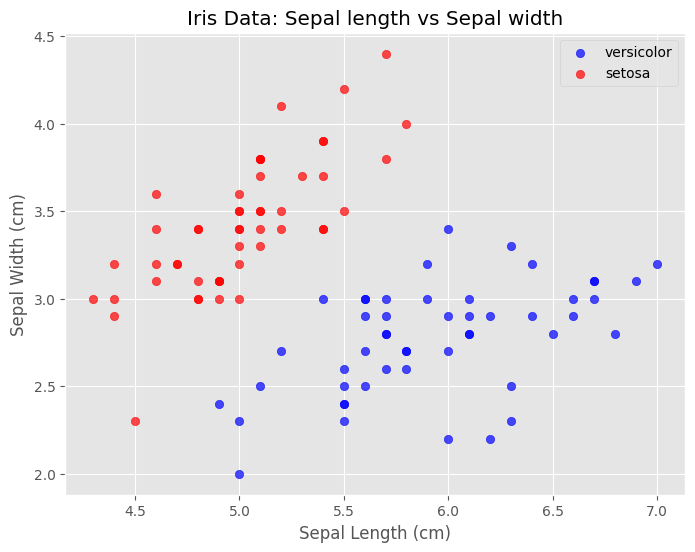

In [10]:
# Plot the data
plt.figure(figsize=(8, 6))
for species, color, label in zip([0, 1], ["blue", "red"], ["versicolor", "setosa"]):
    subset = iris[iris["species"] == species]
    plt.scatter(
        subset["sepal_length"], subset["sepal_width"], c=color, label=label, alpha=0.7
    )
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Data: Sepal length vs Sepal width")
plt.legend()
plt.show()

In [ ]:
# Store the strongest features and target categories for using in the model


#### Step 3: Instantiate a LogisticRegression Object

In [11]:
iris_regression = LogisticRegression()

#### Step 4: Fit the model

In [12]:
iris_regression.fit(x_iris, y_iris)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

Now that the regression has been fit, we can use the `predict` method to forecast whether our model thinks a family will switch wells.

In [13]:
# Predict the target for the whole dataset
iris_prediction = iris_regression.predict(x_iris)

new_iris = pd.DataFrame(
    {
        "sepal_length": [5.0],
        "sepal_width": [3.0],
        "petal_length": [1.6],
        "petal_width": [0.3]
    }
)
new_iris["species"] = iris_regression.predict(new_iris)
print(f"New iris is: \n{new_iris}")

New iris is: 
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.0          3.0           1.6          0.3        1


Additionally (and in many cases more usefully), the `LogisticRegression` has a `predict_proba` method that produces a predicted **probability**.

In [14]:
# Predict the probabilities for the whole dataset
iris_probabilities = iris_regression.predict_proba(x_iris)

# Print the predicted probabilities
new_iris = pd.DataFrame(
    {
        "sepal_length": [5.0],
        "sepal_width": [3.0],
        "petal_length": [1.6],
        "petal_width": [0.3],
    }
)
new_iris_probabilities = iris_regression.predict_proba(new_iris)
print(f"Probabilities for new iris are:\n{new_iris_probabilities}")

Probabilities for new iris are:
[[0.04082934 0.95917066]]


#### Step 5: Plot the Predictions

Text(0, 0.5, 'species Probability')

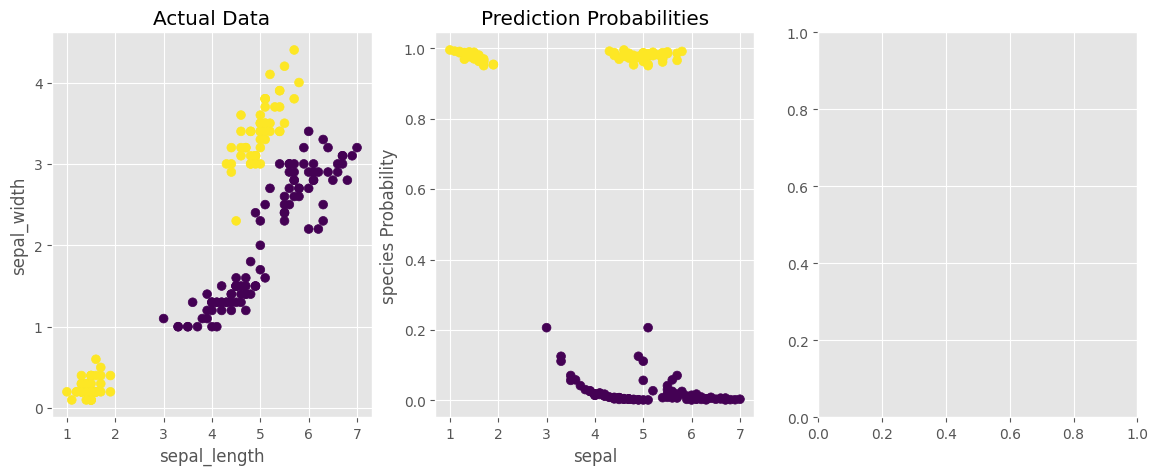

In [ ]:
# Plot the predictions compared to the actual data

fig, axs = plt.subplots(1, 3, figsize=(14, 5))

axs[0].scatter(iris.petal_length, iris.petal_width, s=40, c=iris['species'])
axs[0].set_title("Actual Data")
axs[0].set_xlabel("petal_length")
axs[0].set_ylabel("petal_width")

axs[0].scatter(iris.sepal_length, iris.sepal_width, s=40, c=iris["species"])
axs[0].set_title("Actual Data")
axs[0].set_xlabel("sepal_length")
axs[0].set_ylabel("sepal_width")

axs[1].scatter(iris.petal_length, iris_probabilities[:, 1], s=40, c=iris["species"])
axs[1].set_title("Prediction Probabilities")
axs[1].set_xlabel("petal")
axs[1].set_ylabel("species Probability")

axs[1].scatter(iris.sepal_length, iris_probabilities[:, 1], s=40, c=iris['species'])
axs[1].set_title("Prediction Probabilities")
axs[1].set_xlabel("sepal")
axs[1].set_ylabel("species Probability")

# axs[2].scatter(iris.petal, iris_predictions, s=40, c=iris['species'])
# axs[2].set_title("Predicted Data")
# axs[2].set_xlabel("sepal")
# axs[2].set_ylabel("species Prediction")

# axs[2].scatter(iris.sepal, iris_predictions, s=40, c=iris["species"])
# axs[2].set_title("Predicted Data")
# axs[2].set_xlabel("petal")
# axs[2].set_ylabel("species Prediction")

#### Step 6: Evaluate The Model

In [19]:
mae = mean_absolute_error(y_true=y_iris, y_pred=iris_probabilities[:, 1])
mse = mean_squared_error(y_true=y_iris, y_pred=iris_probabilities[:, 1])
print("MAE:", mae)
print("MSE:", mse)
print()

# Calculate the loss and cost of the model
model_loss = pd.DataFrame(
    {
        "Target": y_iris,
        "Predicted result": iris_probabilities[:, 1],
        "Loss": abs(y_iris - iris_regression.predict(x_iris).round(2)),
    }
)
model_loss["Predicted result"] = model_loss["Predicted result"].round(0)
model_loss["Loss"] = model_loss["Loss"].abs()
model_cost = (1 / model_loss.shape[0]) * (
    model_loss["Loss"].sum() / model_loss.shape[0]
)

print(f"The cost of this model is  {model_cost:.5f}")
print(
    f"The model predicted incorrectly {model_loss['Loss'].sum()} times out of {model_loss.shape[0]} predictions"
)
print(model_loss)

MAE: 0.021969522892372258
MSE: 0.0011995808399747365

The cost of this model is  0.00000
The model predicted incorrectly 0 times out of 100 predictions
    Target  Predicted result  Loss
0        1               1.0     0
1        1               1.0     0
2        1               1.0     0
3        1               1.0     0
4        1               1.0     0
..     ...               ...   ...
95       0               0.0     0
96       0               0.0     0
97       0               0.0     0
98       0               0.0     0
99       0               0.0     0

[100 rows x 3 columns]
